In [1]:
import numpy as np
import csv
import os as os
import skimage.measure 
import pandas as pd

In [2]:
#variabel list array digunakan pada kodingan selanjutnya
data = []
labels = []
mestd = []
x_train = []

#membuka file csv dan membaca isi dataset dan memasukkannya ke data
with open('Rupiah_money_data_list.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        data.append(row)
        
#mengambil file csv namun diubah kedalam data frame yang digunakan untuk visualisasi data
df = pd.read_csv('Rupiah_money_data_list.csv', usecols= ['label','mean','std','skewness','entropy'])

#agar label mean, std, skewness tidak ikut masuk ke dalam x_train
header = data.pop(0)

In [3]:
i = 0
#memasukkan data mean, std, skewness, dan entropy ke dalam x_train dengan format list 
for label in data:
    labels.append(label[1])
    mestd = list(np.array([label[2],label[3],label[4],label[5]]))
    x_train.append(mestd)
    

In [4]:
#mengatur format data
x_train = np.array([list(map(float, x)) for x in x_train])
y_train = np.array(labels)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

#training dengan menentukan nilai K dan menggunakan library sklearn
K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train) #memasukkan x_train dan y_train untuk dilatih

KNeighborsClassifier()

In [6]:
#Uji coba atau prediksi menggunakan satu gambar
import cv2 as cv
import matplotlib.pyplot as plt

#Preprocessing
img_size = 400
image = cv.imread("./Images/Testing2/20rb/IMG_20211114_160618.jpg") #uang 20rb
image_bgr = cv.cvtColor(image,cv.COLOR_RGB2BGR)
image_size = cv.resize(image_bgr,(img_size,img_size))
image_hsv = cv.cvtColor(image_size, cv.COLOR_BGR2HSV)

#Ekstraksi fitur HSV
mean = np.mean(image_hsv)
std = np.std(image_hsv)
skewness = np.mean(abs(image_hsv - image_hsv.mean()) ** 3)
skewness = skewness ** (1./3)
entropy = skimage.measure.shannon_entropy(image_hsv)

#memasukkan fitur ke list new
new = np.array([mean,std,skewness,entropy]).reshape(1,-1)
new

array([[91.6712125 , 65.84162655, 71.83379082,  7.29010884]])

In [7]:
#mencoba prediksi nilai gambar 20rb
y_new = model.predict(new)
y_new

array(['20rb'], dtype='<U5')

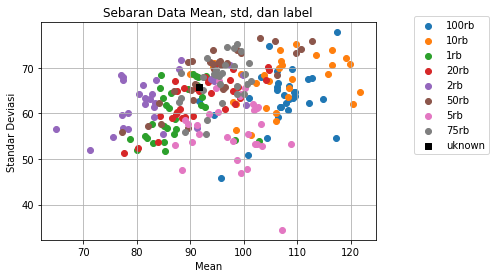

In [8]:
#visualisasi nearest neighbours untuk data 20rb
fig, ax = plt.subplots()
for label, d in df.groupby('label'):
    ax.scatter(d['mean'], d['std'], label=label)
    
plt.scatter(mean,std,marker='s',color='black',label='uknown')

plt.legend(bbox_to_anchor=(1.1,1.05))
plt.title('Sebaran Data Mean, std, dan label')
plt.xlabel('Mean')
plt.ylabel('Standar Deviasi')
plt.grid(True)
plt.show()

In [9]:
#Hitung jarak Euclidean Distance untuk data 20rb
from scipy.spatial.distance import euclidean

uknown = np.array([mean,std,skewness,entropy])

jarak = [euclidean(uknown,d) for d in x_train]

In [10]:
#menambahkan kolom jarak dan mengurutkan sesuai jarak terdekat dengan data 20rb
df['jarak'] = jarak
df.sort_values(['jarak']).iloc[0:10]

,label,mean,std,skewness,entropy,jarak
148,20rb,91.018717,65.519129,71.487816,7.436230,0.819027
162,50rb,90.926460,66.358175,72.973296,7.435516,1.463248
185,75rb,92.352275,65.098418,70.576023,7.499075,1.625377
126,20rb,93.288188,66.850570,72.077719,7.362319,1.922834
127,20rb,91.669908,64.854044,70.182123,7.379961,1.926500
208,75rb,92.392515,67.984501,71.301364,7.194419,2.324828
12,1rb,91.388852,68.052945,72.545040,7.375888,2.341557
20,1rb,89.570090,65.327874,70.145464,7.413980,2.746716
22,1rb,91.270050,66.183343,74.575458,7.556075,2.804493
125,20rb,92.852658,67.879159,73.437483,7.361637,2.850315


In [11]:
#Evaluasi KNN Classification Model
mestd = []
labels = []

#mengambil path setiap kategori pada folder testing2
data_dir = './Images/Testing2/'
categories = ['1rb','2rb','5rb','10rb','20rb','50rb','75rb','100rb']

#fungsi membuat data yang akan di testing
def create_testing_data():
    for category in categories:
        
        #menggabungkan path data_dir dengan categori-categori folder 
        path = os.path.join(data_dir,category)
        
        #memasukkan category ke class_num sebagai label
        class_num = category
        
        #mengambil gambar satu persatu pada masing-masing folder
        for image in os.listdir(path):
            try:
                #Preprocessing
                images = cv.imread(os.path.join(path,image)) #gabungin path dan image
                images_bgr = cv.cvtColor(images,cv.COLOR_RGB2BGR) #convert image dari RGB ke BGR
                images_size = cv.resize(images_bgr,(img_size,img_size)) #resize image ke 400x400
                image_hsv = cv.cvtColor(images_size, cv.COLOR_BGR2HSV) #convert image dari BGR ke HSV
                
                #Ekstraksi fitur HSV
                mean = np.mean(image_hsv)
                std = np.std(image_hsv)
                skewness = np.mean(abs(image_hsv - image_hsv.mean()) ** 3)
                skewness = skewness ** (1./3)
                entropy = skimage.measure.shannon_entropy(image_hsv)
                
                #Memasukkan masing masing ekstraksi HSV ke list array mestd dan labels untuk labelnya
                hasil = np.array([mean,std,skewness,entropy])
                mestd.append(hasil)
                
                labels.append(class_num)
                    
            except Exception as e:
                pass

#memanggil fungsi
create_testing_data()

#memasukkan data testing ke x_test dan y_test
x_test = np.array(mestd)
y_test = np.array(labels)

print(y_test)

['1rb' '1rb' '1rb' '1rb' '2rb' '2rb' '2rb' '2rb' '5rb' '5rb' '5rb' '5rb'
 '10rb' '10rb' '10rb' '10rb' '20rb' '20rb' '20rb' '20rb' '50rb' '50rb'
 '50rb' '50rb' '75rb' '75rb' '75rb' '75rb' '100rb' '100rb' '100rb' '100rb']


In [12]:
#prediksi terhadap testing set
y_pred = model.predict(x_test)
y_pred

array(['5rb', '1rb', '1rb', '1rb', '2rb', '2rb', '2rb', '20rb', '5rb',
       '10rb', '5rb', '5rb', '10rb', '10rb', '100rb', '10rb', '20rb',
       '5rb', '100rb', '20rb', '1rb', '50rb', '50rb', '20rb', '75rb',
       '75rb', '75rb', '75rb', '100rb', '100rb', '100rb', '100rb'],
      dtype='<U5')

In [13]:
#Accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(acc)

0.75


In [14]:
#classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       100rb       0.67      1.00      0.80         4
        10rb       0.75      0.75      0.75         4
         1rb       0.75      0.75      0.75         4
        20rb       0.50      0.50      0.50         4
         2rb       1.00      0.75      0.86         4
        50rb       1.00      0.50      0.67         4
         5rb       0.60      0.75      0.67         4
        75rb       1.00      1.00      1.00         4

    accuracy                           0.75        32
   macro avg       0.78      0.75      0.75        32
weighted avg       0.78      0.75      0.75        32



In [15]:
# Calculating error for K values between 1 and 20

error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

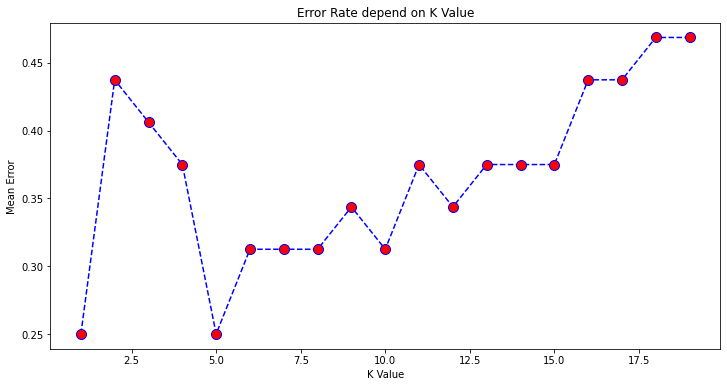

In [16]:
#membuat plot untuk melihat error untuk berbagai nilai K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate depend on K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [17]:
from tkinter import *
from tkinter import filedialog
import cv2
from PIL import Image, ImageTk
import os

In [ ]:
root =  Tk()

gambar = ""

def tampilGambar(path):
    global gambar
    gambar.destroy()
    
    duit = Image.open(path)
    
    duits = ImageTk.PhotoImage(duit)
    
    gambar = Label(image=duits)
    gambar.Image = duits
    gambar.place(relx = 0.4, rely = 0.1)


def inputGambar():
    path = filedialog.askopenfilename(filetypes=[('Image File','.jpg .png .jpeg')])
    
    img_size = 400
    image = cv2.imread(path)
    image_bgr = cv.cvtColor(image,cv.COLOR_RGB2BGR)
    image_size = cv.resize(image_bgr,(img_size,img_size))
    image_hsv = cv.cvtColor(image_size, cv.COLOR_BGR2HSV)
    
    #HSV
    mean = np.mean(image_hsv)
    std = np.std(image_hsv)
    skewness = np.mean(abs(image_hsv - image_hsv.mean()) ** 3)
    skewness = skewness ** (1./3)
    entropy = skimage.measure.shannon_entropy(image_hsv)
    
    new = np.array([mean,std,skewness,entropy]).reshape(1,-1)
    
    y_new = model.predict(new)
    
    if(y_new == '1rb'):
        hasil.config(text="Hasil Deteksi = Rp 1.000,00")
        tampilGambar("Images/TampilGambar/1rb.png")
    elif(y_new == '2rb'):
        hasil.config(text="Hasil Deteksi = Rp 2.000,00")
        tampilGambar("Images/TampilGambar/2rb.png")
    elif(y_new == '5rb'):
        hasil.config(text="Hasil Deteksi = Rp 5.000,00")
        tampilGambar("Images/TampilGambar/5rb.png")
    elif(y_new == '10rb'):
        hasil.config(text="Hasil Deteksi = Rp 10.000,00")
        tampilGambar("Images/TampilGambar/10rb.png")
    elif(y_new == '20rb'):
        hasil.config(text="Hasil Deteksi = Rp 20.000,00")
        tampilGambar("Images/TampilGambar/20rb.png")
    elif(y_new == '50rb'):
        hasil.config(text="Hasil Deteksi = Rp 50.000,00")
        tampilGambar("Images/TampilGambar/50rb.png")
    elif(y_new == '75rb'):
        hasil.config(text="Hasil Deteksi = Rp 75.000,00")
        tampilGambar("Images/TampilGambar/75rb.png")
    elif(y_new == '100rb'):
        hasil.config(text="Hasil Deteksi = Rp 100.000,00")
        tampilGambar("Images/TampilGambar/100rb.png")
    else:
        hasil.config(text="Image Tidak Dapat Terdeteksi!")
        

    

root.title("Rupiah Detector APP - RuTor")
root.geometry('500x200')

import_img = Button(root,text = 'import', font=("",10), bd=5, command=inputGambar)
import_img.place(relx = 0.2, rely = 0.3, anchor = N)

hasil = Label(root, text="", font=("",10))
hasil.place(relx = 0.4, rely = 0.7)

gambar = Label()



root.mainloop()